---
freeze: true              
format:
  html:
    embed-resources: true
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [8]:
!pip install palmerpenguins


In [10]:
import pandas as pd
from palmerpenguins import load_penguins


penguins = load_penguins()

cols = ['bill_depth_mm','bill_length_mm','flipper_length_mm','body_mass_g','year',
        'species','island','sex']
df = penguins[cols].dropna()   # drop rows with NA in any used column

df = pd.get_dummies(df, columns=['species','island','sex'], drop_first=True)

y = df['bill_depth_mm']
X_all = df.drop(columns='bill_depth_mm')

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

                     model  n_features  MSE_train  MSE_test  R2_train  \
3  M4: ALL (incl. dummies)           9   0.536342  0.812552  0.860970   
1            M2: + flipper           2   2.290034  2.850048  0.406381   
2        M3: + mass + year           4   2.246094  2.852541  0.417771   
0               M1: length           1   3.651903  3.732114  0.053360   

    R2_test  
3  0.783941  
1  0.242169  
2  0.241506  
0  0.007627  


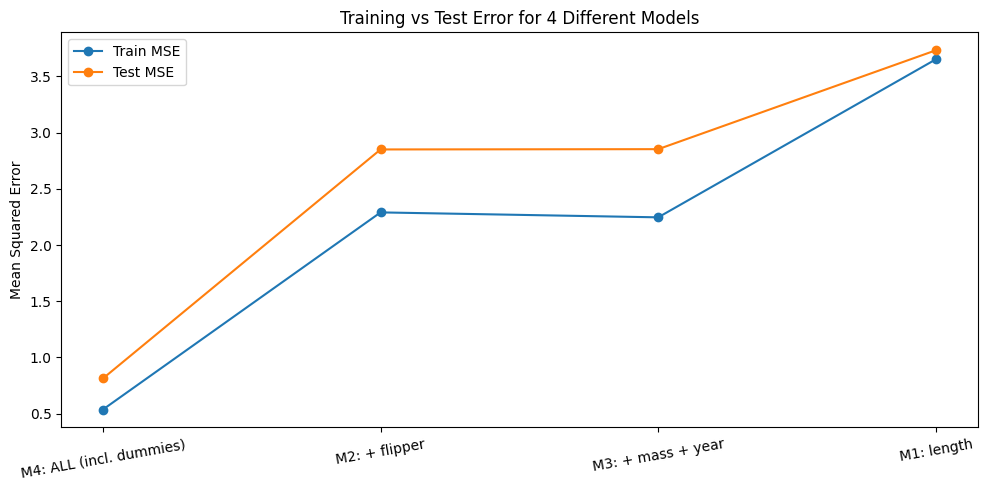

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


model_specs = {
    "M1: length": ["bill_length_mm"],
    "M2: + flipper": ["bill_length_mm", "flipper_length_mm"],
    "M3: + mass + year": ["bill_length_mm", "flipper_length_mm", "body_mass_g", "year"],
    "M4: ALL (incl. dummies)": list(X_all.columns)
}

# 4) One split used for all models so comparisons are fair
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_all, y, test_size=0.25, random_state=42
)

# 5) Fit/evaluate each model
rows = []
for name, feats in model_specs.items():
    Xtr, Xte = X_train_full[feats], X_test_full[feats]
    mdl = LinearRegression().fit(Xtr, y_train)
    ytr_hat, yte_hat = mdl.predict(Xtr), mdl.predict(Xte)
    rows.append({
        "model": name,
        "n_features": len(feats),
        "MSE_train": mean_squared_error(y_train, ytr_hat),
        "MSE_test":  mean_squared_error(y_test,  yte_hat),
        "R2_train":  r2_score(y_train, ytr_hat),
        "R2_test":   r2_score(y_test,  yte_hat)
    })

perf = pd.DataFrame(rows).sort_values("MSE_test")
print(perf)

idx = np.arange(1, len(perf) + 1)
plt.figure(figsize=(10,5))
plt.plot(idx, perf["MSE_train"], marker="o", label="Train MSE")
plt.plot(idx, perf["MSE_test"],  marker="o", label="Test MSE")
plt.xticks(idx, perf["model"], rotation=10)
plt.ylabel("Mean Squared Error")
plt.title("Training vs Test Error for 4 Different Models")
plt.legend()
plt.tight_layout()
plt.show()

Answer:

Based on the plot, M4 is the best model becasue it has the lowest test MSE, highest test R², reasonable train-test gap.